# German Projection

In [1]:
import numpy as np

import cartopy.crs as crs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt

## Add some features

In [2]:
shpdir = "shpdir/"
fname = shpdir +  "gadm36_DEU_1.shp"
adm1_shapes = list(shpreader.Reader(fname).geometries())

In [3]:
states_provinces = cfeature.NaturalEarthFeature(category='cultural',
                                                name='admin_0_boundary_lines_land',
                                                scale='10m',facecolor='none')

In [4]:
river_lake = cfeature.NaturalEarthFeature(category='physical',
                                                name='rivers_lake_centerlines',
                                                scale='10m',facecolor='none')

In [5]:
urban = cfeature.NaturalEarthFeature(category='cultural',
                                     name='urban_areas',
                                     scale='10m',facecolor='none')
roads = cfeature.NaturalEarthFeature(category='cultural',
                                     name='roads',
                                     scale='10m',facecolor='none')

In [6]:
def plot_region(projection=crs.EuroPP(),lon1=5.7,lon2=15.2,lat1=47.06,lat2=54.9):
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection=projection))
    fig.subplots_adjust(left=0.02, right=0.98, top=0.91,bottom=0.02)#, wspace=0.14)
    ax.set_extent([lon1,lon2,lat1,lat2])
    ax.coastlines('10m', linewidth=1.2,zorder=1)

    ax.add_feature(states_provinces, edgecolor='black',zorder=1)
    ax.add_geometries(adm1_shapes, crs.PlateCarree(), edgecolor='black',facecolor='None', zorder=2)

    return fig, ax


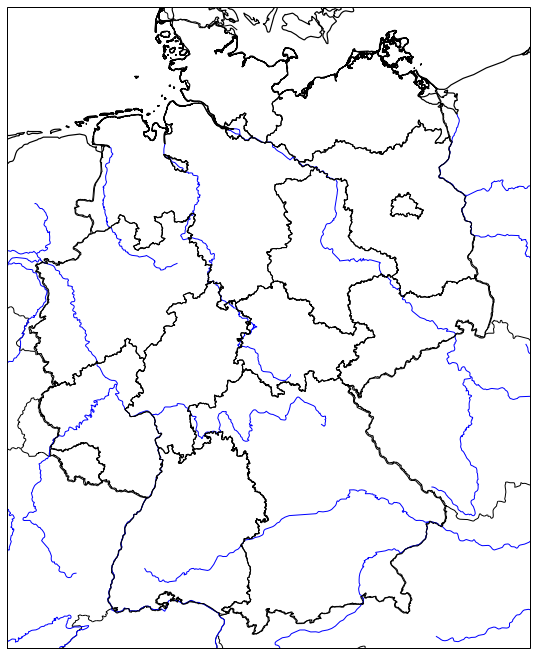

In [7]:
fig, ax = plot_region()
ax.add_feature(river_lake, edgecolor='blue',zorder=1)
plt.show()

In [8]:
def plot_ce(projection=crs.EuroPP(),lon1=5.8,lon2=15.8,lat1=47.1,lat2=55.2):
    fig, ax = plt.subplots(1,1,figsize=(14, 16), subplot_kw=dict(projection=projection))
    fig.subplots_adjust(left=0.02, right=0.98, top=0.91,bottom=0.02)#, wspace=0.14)
    ax.set_extent([lon1,lon2,lat1,lat2])
    ax.coastlines('10m', linewidth=1.2)
    ax.add_feature(states_provinces, edgecolor='black',zorder=1)
    ax.add_feature(urban, facecolor='lightgray',zorder=3)
    ax.add_feature(roads, edgecolor='sienna',zorder=2)
    plt.title("German Projection",fontsize=40)
    return fig, ax

### Note the impact of the argument "zorder"

The red dot is unseen under the urban area layer.

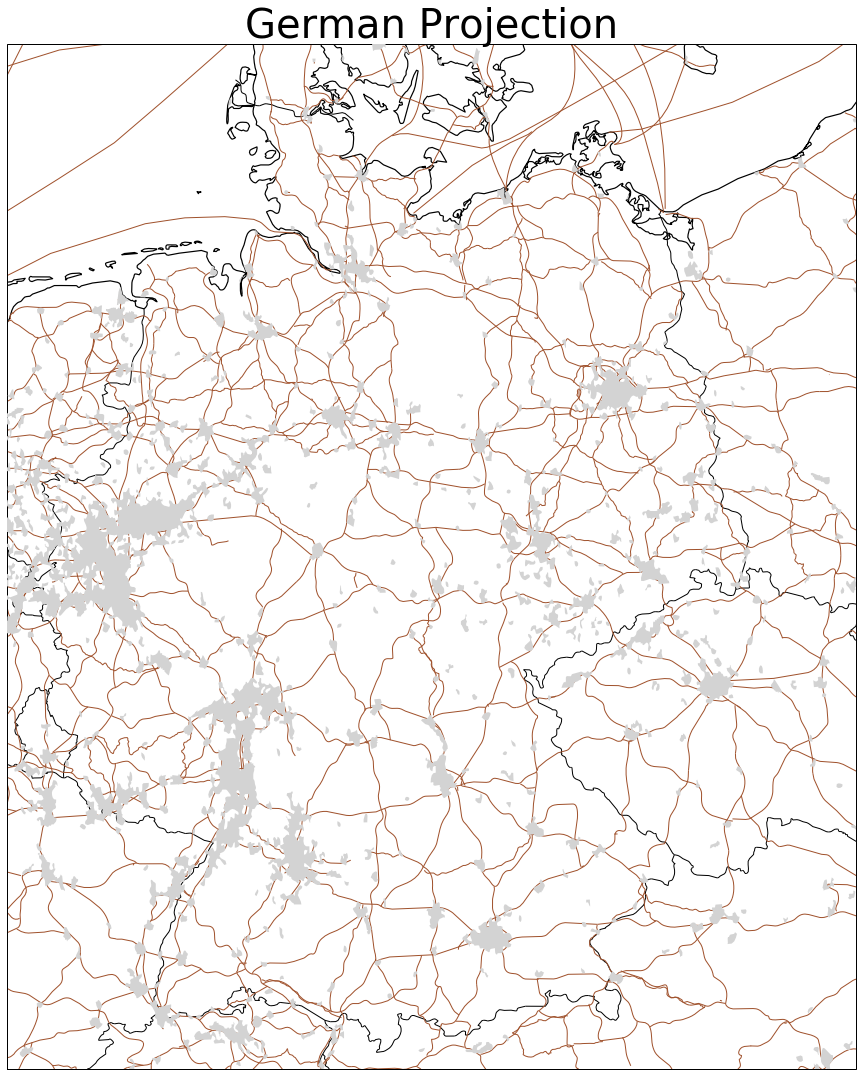

In [9]:
fig, ax = plot_ce()
ax.scatter(7,51.5,marker='o',s=80,color="red",transform=crs.PlateCarree(),zorder=1)#will be invisible
plt.show()

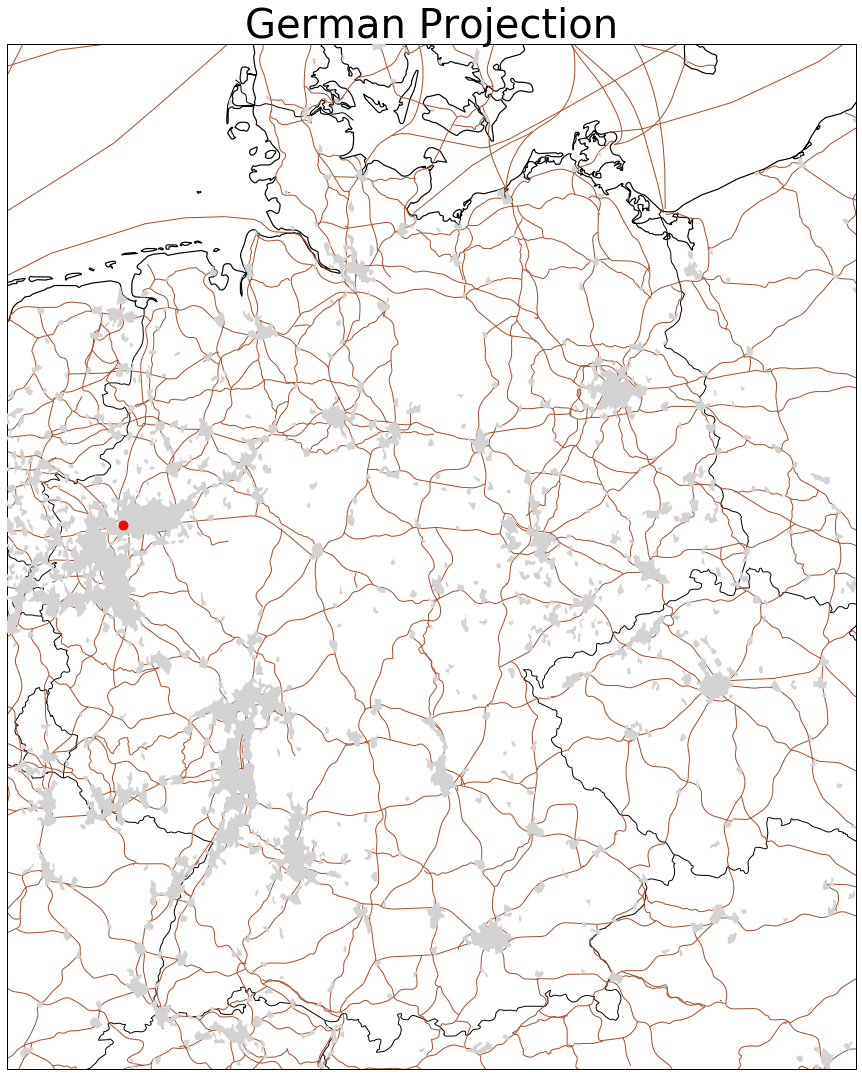

In [10]:
fig, ax = plot_ce()
ax.scatter(7,51.5,marker='o',s=80,color="red",transform=crs.PlateCarree(),zorder=5)
plt.show()